# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context


AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective


To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

# **libraries upload**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# **Data Upload**

In [49]:
loan=pd.read_csv("Loan_Modelling.csv")
df=loan.copy()

# Data Exploration

In [50]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [51]:
df.shape

(5000, 14)

* We have 5000 rows & 14 columns.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* We have 14 columns and all of them are numerical data.
* CCAvg is different than others which have float numerical data.
* There are zero missing values in all columns.

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* ID: Customer ID ,it has no effect statistical calculations.
* Age: Customer’s age in completed years, it has mean of 45 with min 23 years old and maximum 67 years old.
* Experience: With #years of professional experience, customers have an average of 20.1 years of experience, ranging from a minimum of -3, which does not make sense, to a maximum of 43.
* Income: Annual income of the customer (in thousand dollars) with mean of 73.77K this column need more exploration.
* ZIP Code: Home Address ZIP code,this column has no big effect on our dataset.
* Family: the Family size of the customer the average family size is 4 members with min of 1 and maximum of 4,we can change it into caterogical.
* CCAvg: Average spending on credit cards per month (in thousand dollars) with mean of $1.93K.
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional.we can change it into caterogical. 
* Mortgage: Value of house mortgage if any. (in thousand dollars).
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### change Family and Education column into category values.

In [54]:
cols = ['Family', 'Education']
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(2), float64(1), int64(11)
memory usage: 479.0 KB


* Family and Education have been changed to category values.

In [55]:
# lets drop the ID column.
df=df.drop(['ID'],axis=1)

In [56]:
cat_col=['Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']


# Exploratory Data Analysis

### Univariate analysis

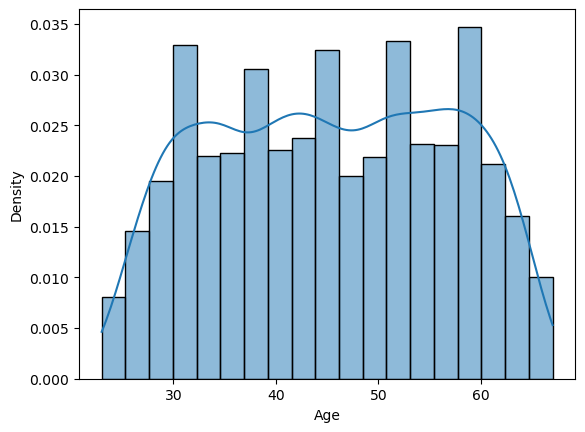

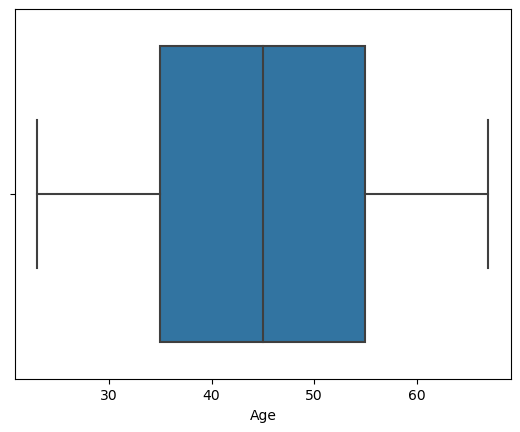

In [57]:
sns.histplot(data=df,x='Age',stat='density',kde=True)
plt.show()
sns.boxplot(data=df,x='Age')
plt.show()

* Age column is normally distibuted.
* No outliers were detected in the age column, indicating that there are no erroneous data points.
* 50% of the customers is between 35-55 years old,with mean of 45.

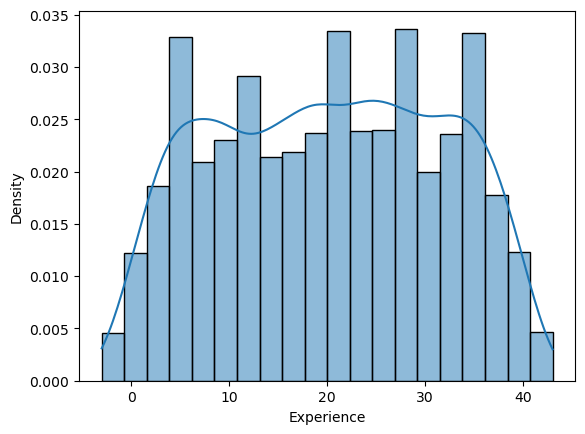

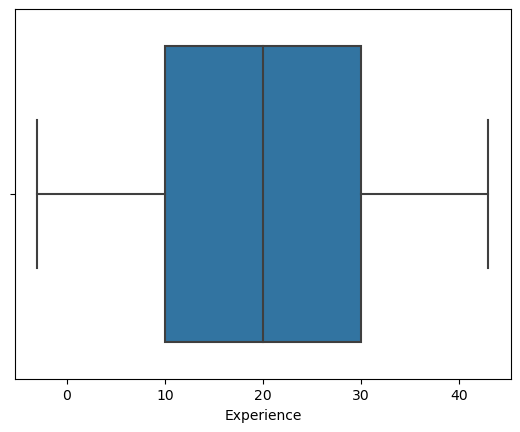

In [58]:
sns.histplot(data=df,x='Experience',stat='density',kde=True)
plt.show()
sns.boxplot(data=df,x='Experience')
plt.show()

* 50% of customers experience is between 10-30 years.
* 25% are below 10 years and 25% are above 30 years of experience.

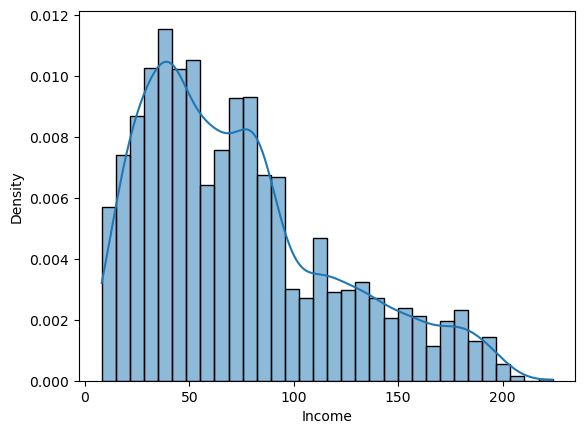

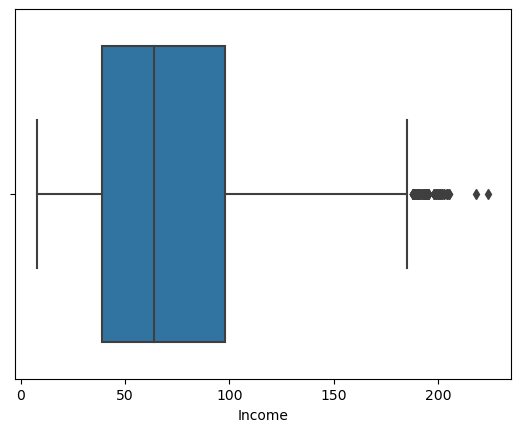

In [59]:
sns.histplot(data=df,x='Income',stat='density',kde=True)
plt.show()
sns.boxplot(data=df,x='Income')
plt.show()

* There is some outliers data apperead in the income column.
* Data shows skewness to the right which means there is extreme values on the higher end of the distribution.


In [60]:
# Now we will explore zip code.
df['ZIPCode'].nunique()

467

In [61]:
df['ZIPCode'].value_counts()

ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: count, Length: 467, dtype: int64

* Customers are from 467 different regions.
* Zipcode 94720 is the most frequent one,we will explore that more.

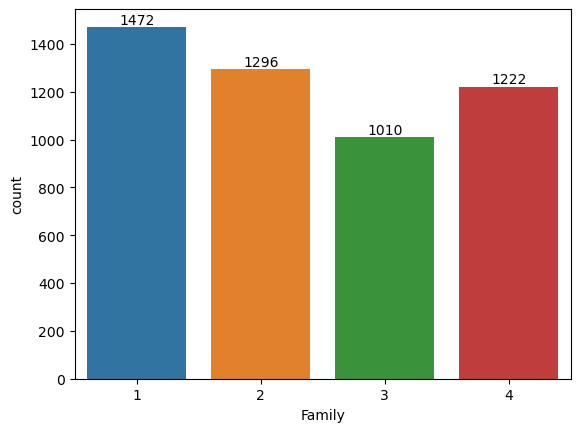

In [62]:
# let's explore Family column.
ax=sns.countplot(data=df,x='Family')
ax.bar_label(ax.containers[0])
plt.show()

In [63]:
df['Family'].value_counts(normalize=True).mul(100)


Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64

* Most customers family members is 1 with 29.44 percentage and count of 1472.
* The smallest customers family members is 3 with 20.2 percentage and count of 1010.

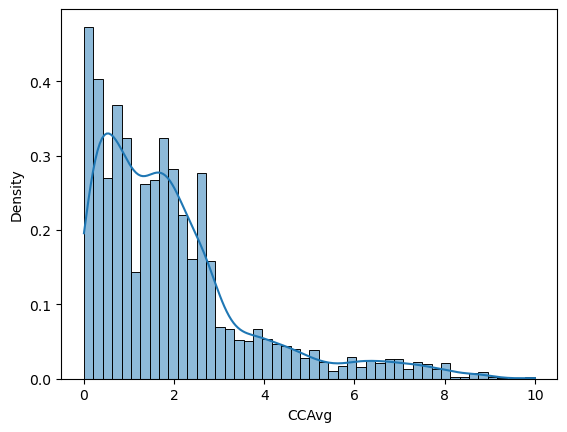

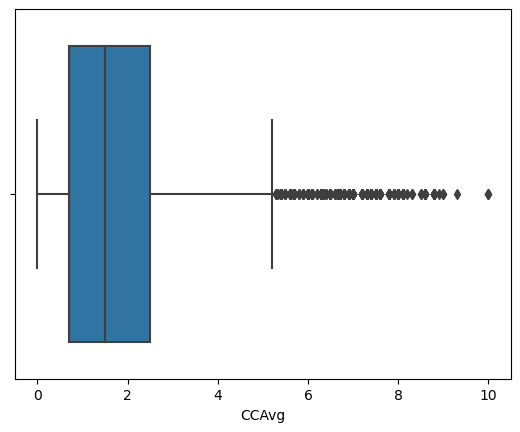

In [64]:
# Now the CCavg.
sns.histplot(data=df,x='CCAvg',stat='density',kde=True)
plt.show()
sns.boxplot(data=df,x='CCAvg')
plt.show()

* Data show some skewness to the right.
* there is outliers in the column,some customers spend much more than the average spending per month.


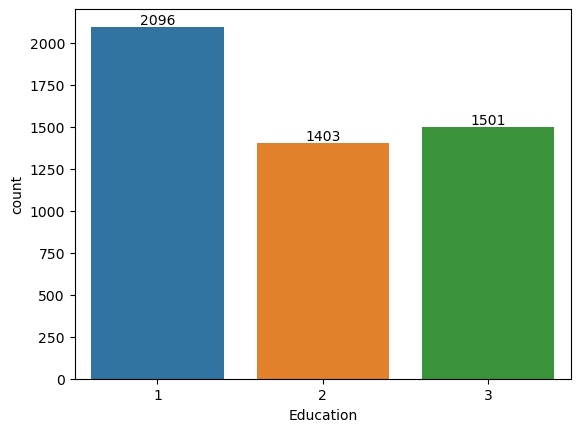

In [65]:
# let's explore Education column.
ax=sns.countplot(data=df,x='Education')
ax.bar_label(ax.containers[0])
plt.show()

In [66]:
df['Education'].value_counts(normalize=True).mul(100)


Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64

* 41.92% of customers education is 1:Undergrad, with count of 2096 customers.
* 30.02% of customers education is 2:Graduate, with count of 1501 customers.
* 28.06% of customers education is 3:Advanced/Professional, with count of 1403 customers.


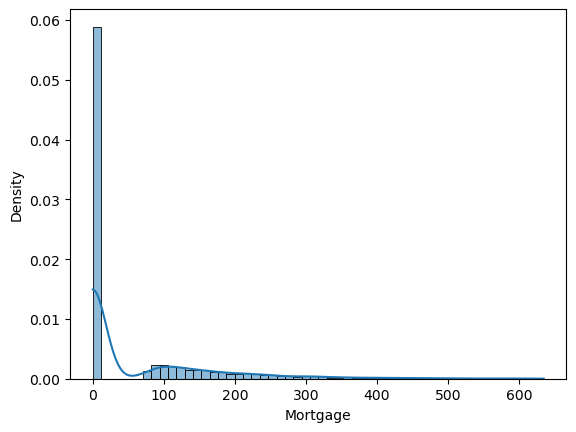

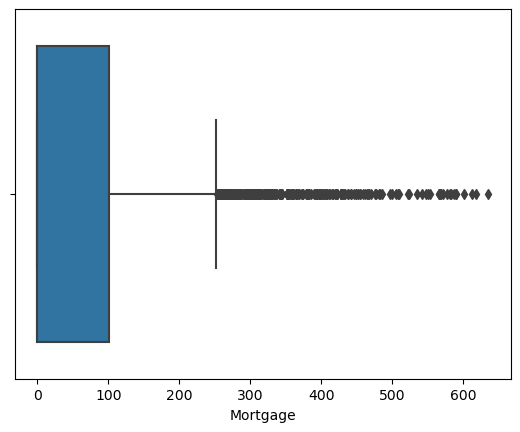

In [67]:
#mortgage
sns.histplot(data=df,x='Mortgage',stat='density',kde=True)
plt.show()
sns.boxplot(data=df,x='Mortgage')
plt.show()

In [68]:
df['Mortgage'].value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

* Graph displays irregular data with non-uniform distribution, including outliers.
* 3462 are 0 values.
* This column need more investigation.

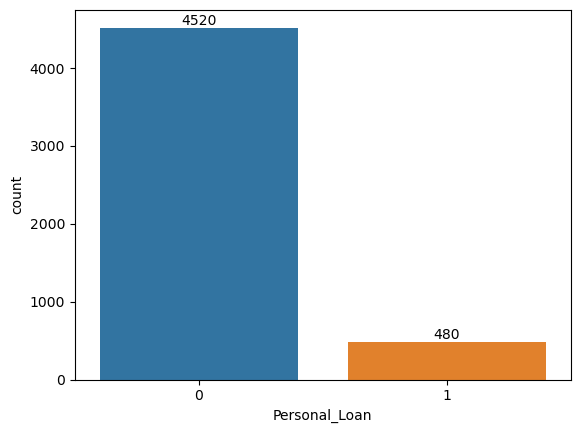

In [69]:
# Personal_loan 
ax=sns.countplot(data=df,x='Personal_Loan')
ax.bar_label(ax.containers[0])
plt.show()


In [70]:
df['Personal_Loan'].value_counts(normalize=True).mul(100)

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

* 4520 customers which are 90.9%  didn't accept the personal loan offered in the last campaign.
* in the other hand 480 customers which 9.6% accept the loan.

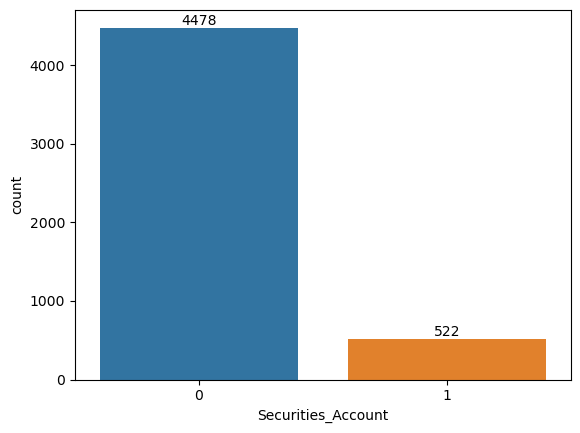

In [71]:
# Securities_Account
ax=sns.countplot(data=df,x='Securities_Account')
ax.bar_label(ax.containers[0])
plt.show()


* 522 customers have a securities account with the bank, while 4478 do not.

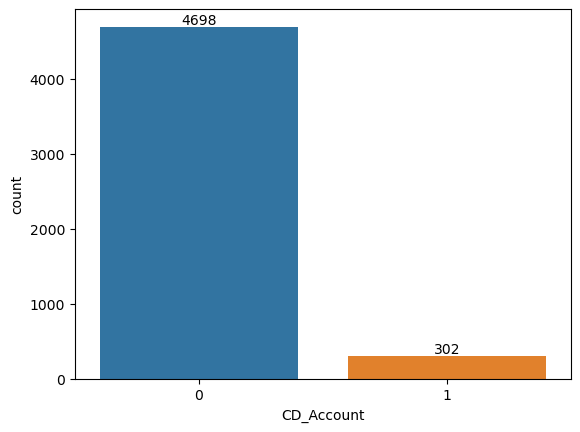

In [72]:
# CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
ax=sns.countplot(data=df,x='CD_Account')
ax.bar_label(ax.containers[0])
plt.show()


* 302 customers have a securities account with the bank, while 4698 do not.

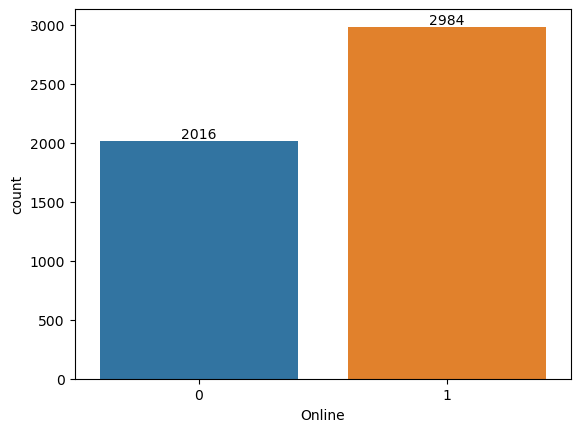

In [73]:
# Online: Do customers use internet banking facilities?
ax=sns.countplot(data=df,x='Online')
ax.bar_label(ax.containers[0])
plt.show()

* 2984 customers are using internet banking facilities, while 2016 do not.

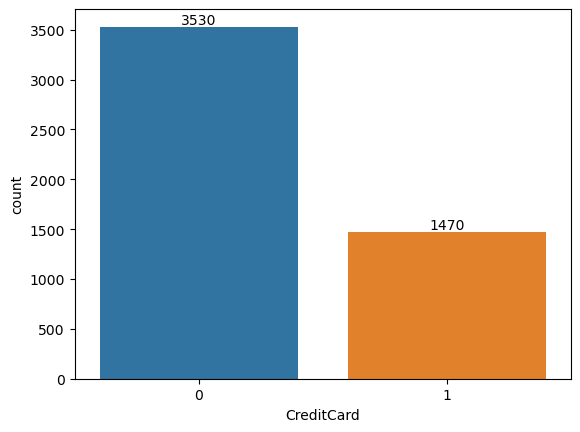

In [74]:
#CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
ax=sns.countplot(data=df,x='CreditCard')
ax.bar_label(ax.containers[0])
plt.show()

* 1470 customers use a credit card issued by any other Bank, while 3530 do not.

# Bivariate Analysis
### Now we will explore the relationship between columns.


#### Let's find out the coorelation between variables.

<Figure size 1000x500 with 0 Axes>

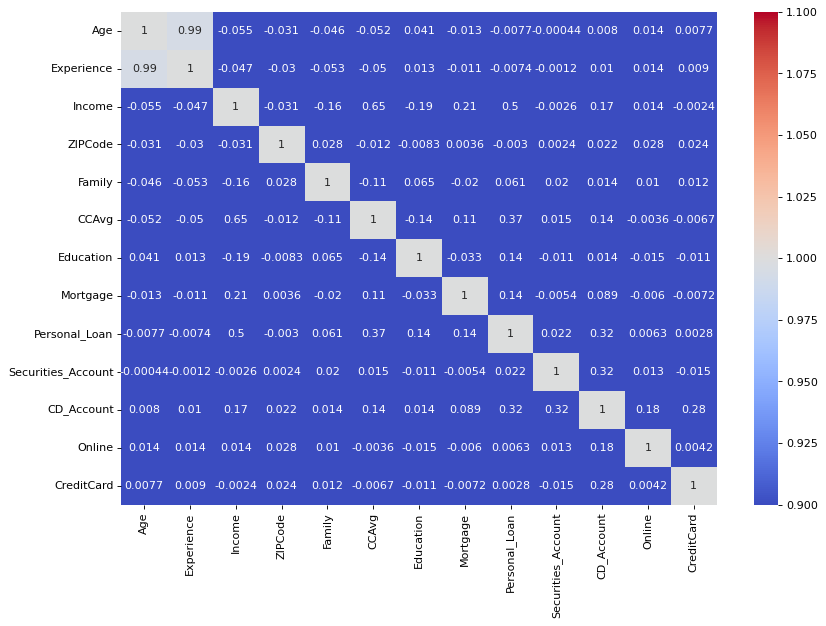

In [75]:
plt.figure(figsize=(10,5))
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=1,vmax=1)
plt.show()

* Personal Loan is highly correlated with Income, CD_Account, CCAvg.
* Experience is highly positive correlated with Age. ( 0.99).
* CCAvg is correlated with Income (0.65) as income increse avergae spending per month will increase.

#### Lets investigate Education vs. Personal_Loan.

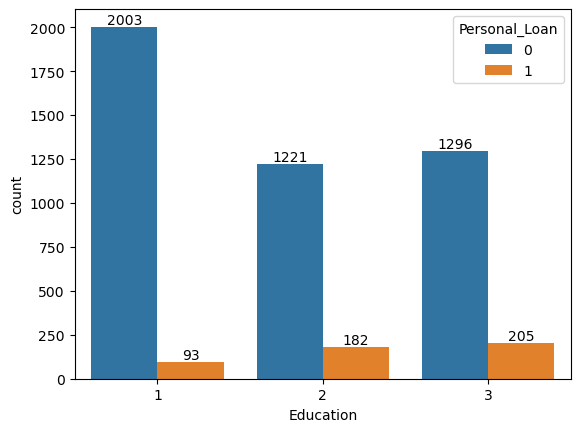

In [76]:
ax=sns.countplot(data=df, x="Education", hue='Personal_Loan')
for container in ax.containers:
    ax.bar_label(container)

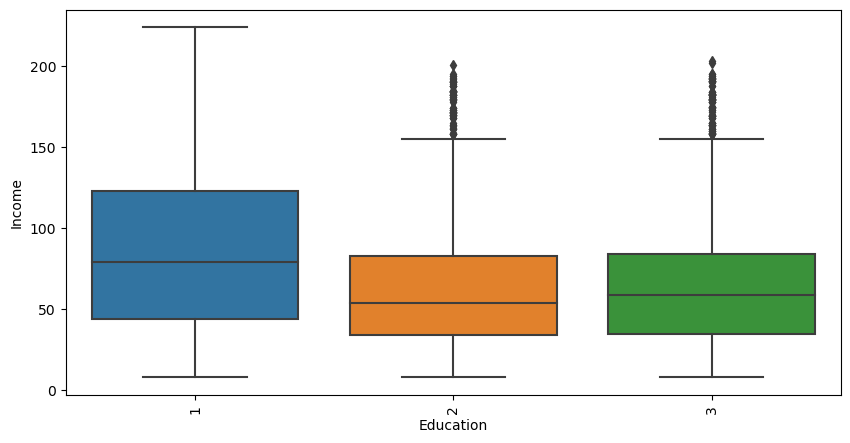

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= df["Education"],y=df['Income'])
plt.show()

In [78]:
df.groupby('Education')['Income'].mean()


Education
1    85.586355
2    64.313614
3    66.122585
Name: Income, dtype: float64

* customers with higher education degree tend to accept personal loan offered in the last campaign.
* customers with undergraduate education have a highest mean income compared to other education levels.





##### Age & experience vs. Income

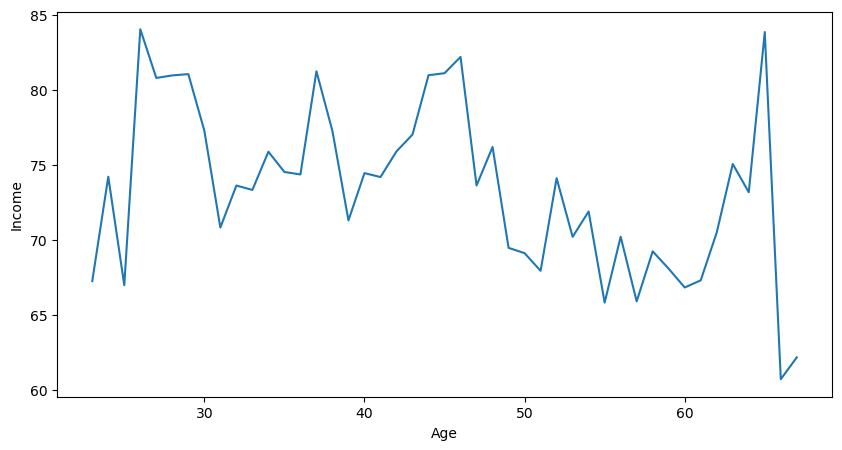

In [79]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Age',y='Income',errorbar=None);
plt.show()

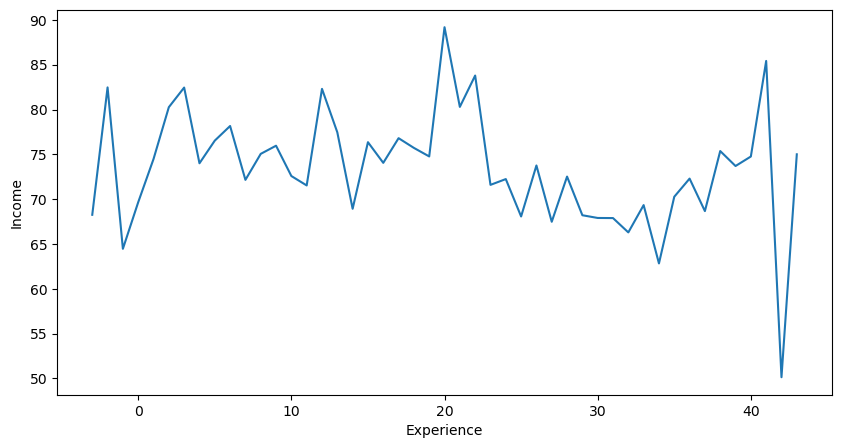

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Experience',y='Income',errorbar=None);
plt.show()

* The corelation between age and income across customers is very low.
* The Experience and income have slightly more corelation tha age and income.

##### Age vs. Experience

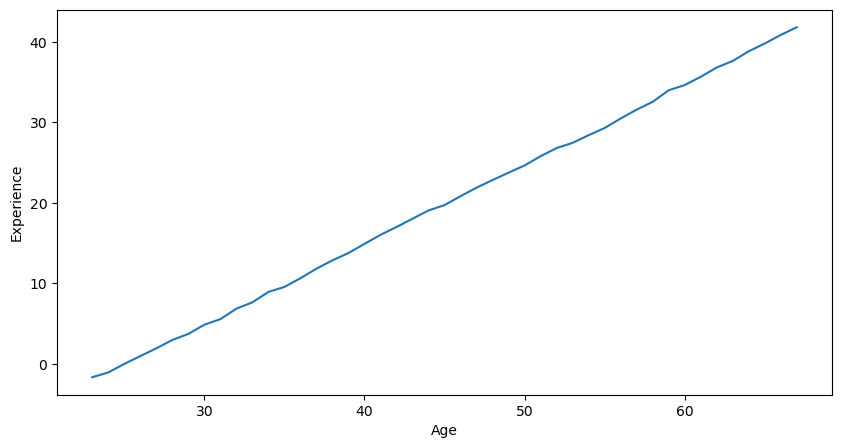

In [81]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Age',y='Experience',errorbar=None);
plt.show()

##### Family members vs. personal loan

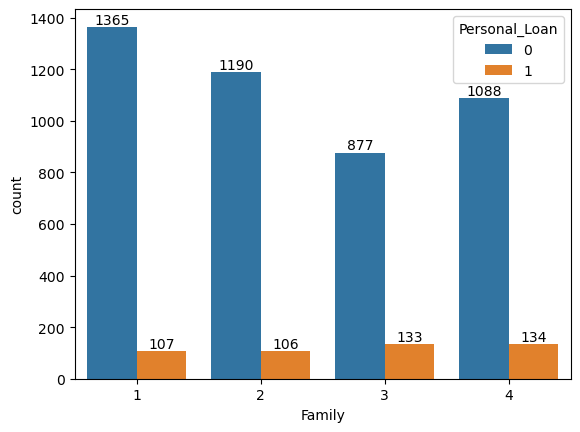

In [82]:
ax=sns.countplot(data=df, x="Family", hue='Personal_Loan')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

* Costomers with higher family members tend to accept personal loan.

##### age vs. online

In [83]:
print("The mean age of customers who are using online services is",df[df['Online'] == 1]['Age'].mean())
print("The mean age of customers who are using online services is",df[df['Online'] == 0]['Age'].mean())

The mean age of customers who are using online services is 45.46749329758713
The mean age of customers who are using online services is 45.14732142857143


* There is no difference in mean between people who are using online services and who are not.

##### CCAvg vs. Income

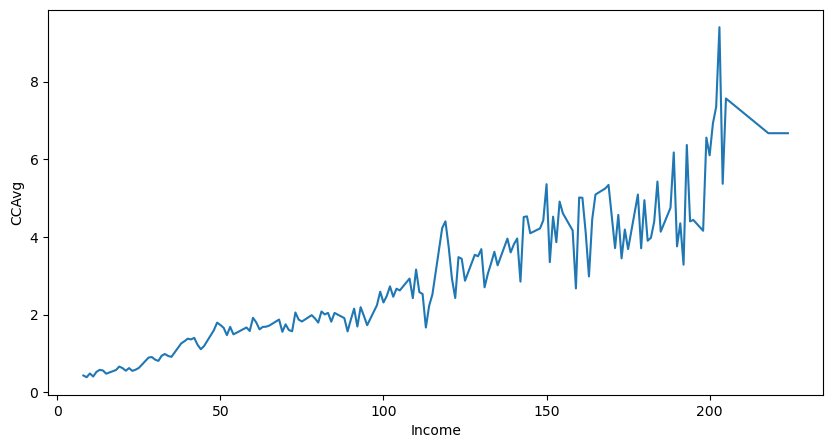

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Income',y='CCAvg',errorbar=None);
plt.show()

* There is a slightly high coorelation between income and spending per month.

##### let's see the highest mortgage mean depending on zipcode.

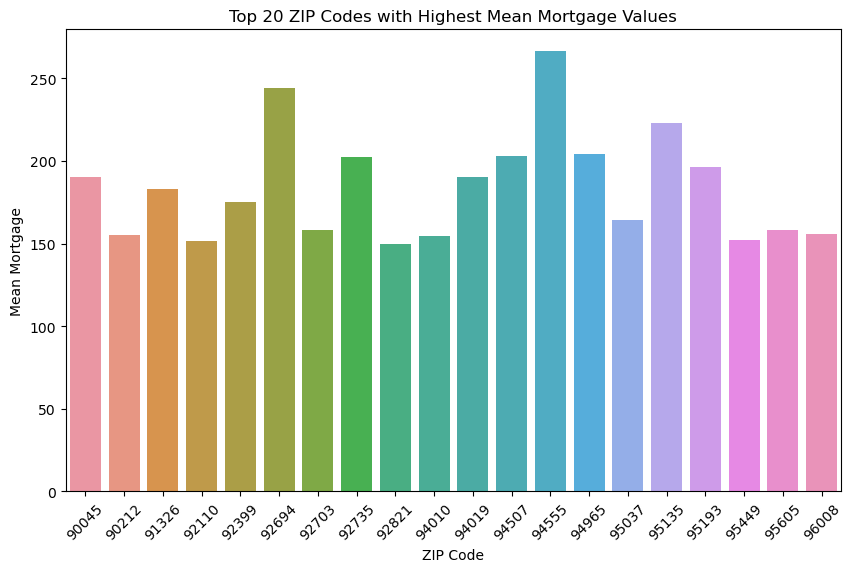

In [85]:
top_zips = df.groupby('ZIPCode')['Mortgage'].mean().sort_values(ascending=False).head(20)

top_zips_df = top_zips.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zips_df, x='ZIPCode', y='Mortgage')
plt.title('Top 20 ZIP Codes with Highest Mean Mortgage Values')
plt.xlabel('ZIP Code')
plt.ylabel('Mean Mortgage')
plt.xticks(rotation=45)
plt.show()

* zipcodes 94555 & 92694 have the highest mortrage mean value.

##### CD_Account vs. Personal_Loan

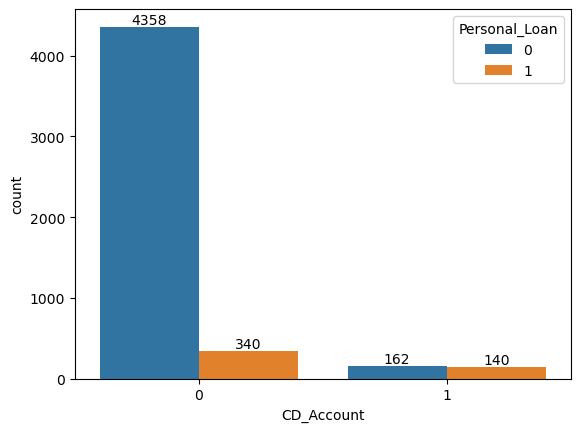

In [86]:
ax=sns.countplot(data=df, x="CD_Account", hue='Personal_Loan')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

* Customers who have a certificate of deposit (CD) account with the bank are more likely to take out a personal loan compared to those who don't have a CD account with the bank.

##### Online vs. Personal_Loan

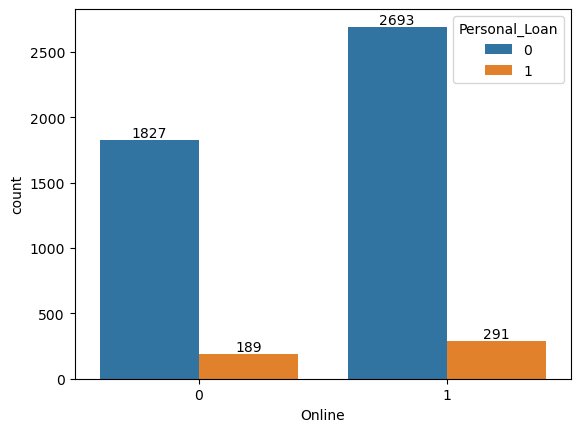

In [87]:
ax=sns.countplot(data=df, x="Online", hue='Personal_Loan')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

* customers who are using online services are tend to accept the loan.

# Data cleaning:

#### Let's check out the ZIPcode values:

In [88]:
for idx in df['ZIPCode']:
    n=0
    if len(str(i))!=5:
        n+=1
    else:
        pass
if 0==n:
     print("All zipcode data are 5 digits")


NameError: name 'i' is not defined

In [ ]:
df[df['Mortgage']==0]['Mortgage'].value_counts()

##### Experience column:

In [ ]:
# There is minus values in the experiance column lets fix that by changing it to positive value.
df['Experience'] = df['Experience'].abs()

##### lets check for null values,

In [ ]:
df.isnull().sum().sum()


* data doesn't cotain null values. 

# Model Building

### Model Evaluation Criterion

##### In this unsupervised machine learning problem, I will use decision tree models. After evaluating their performance, I will select the model with the best score.

In [94]:
df_dummies = pd.get_dummies(df, columns=['Education', 'Family'],dtype=int)
df_dummies.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,94112,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,91330,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [95]:
X = df_dummies.drop(['Personal_Loan'], axis=1)
X.head(10)
y = df_dummies['Personal_Loan']
y.head(10)
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3500, 17)
The shape of X_test:  (1500, 17)


In [96]:
X.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,91107,1.6,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,1.5,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,94720,1.0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,94112,2.7,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,91330,1.0,0,0,0,0,1,0,1,0,0,0,0,1


In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [99]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=1)

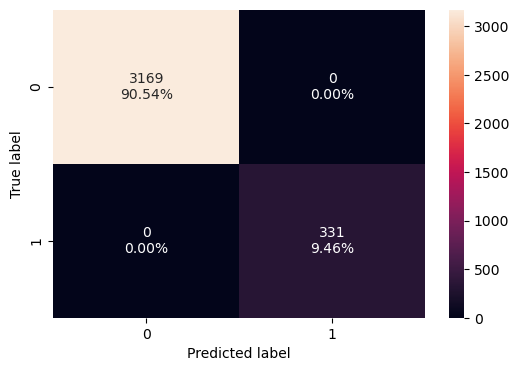

In [100]:
confusion_matrix_sklearn(model, X_train, y_train)

In [101]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [102]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4']


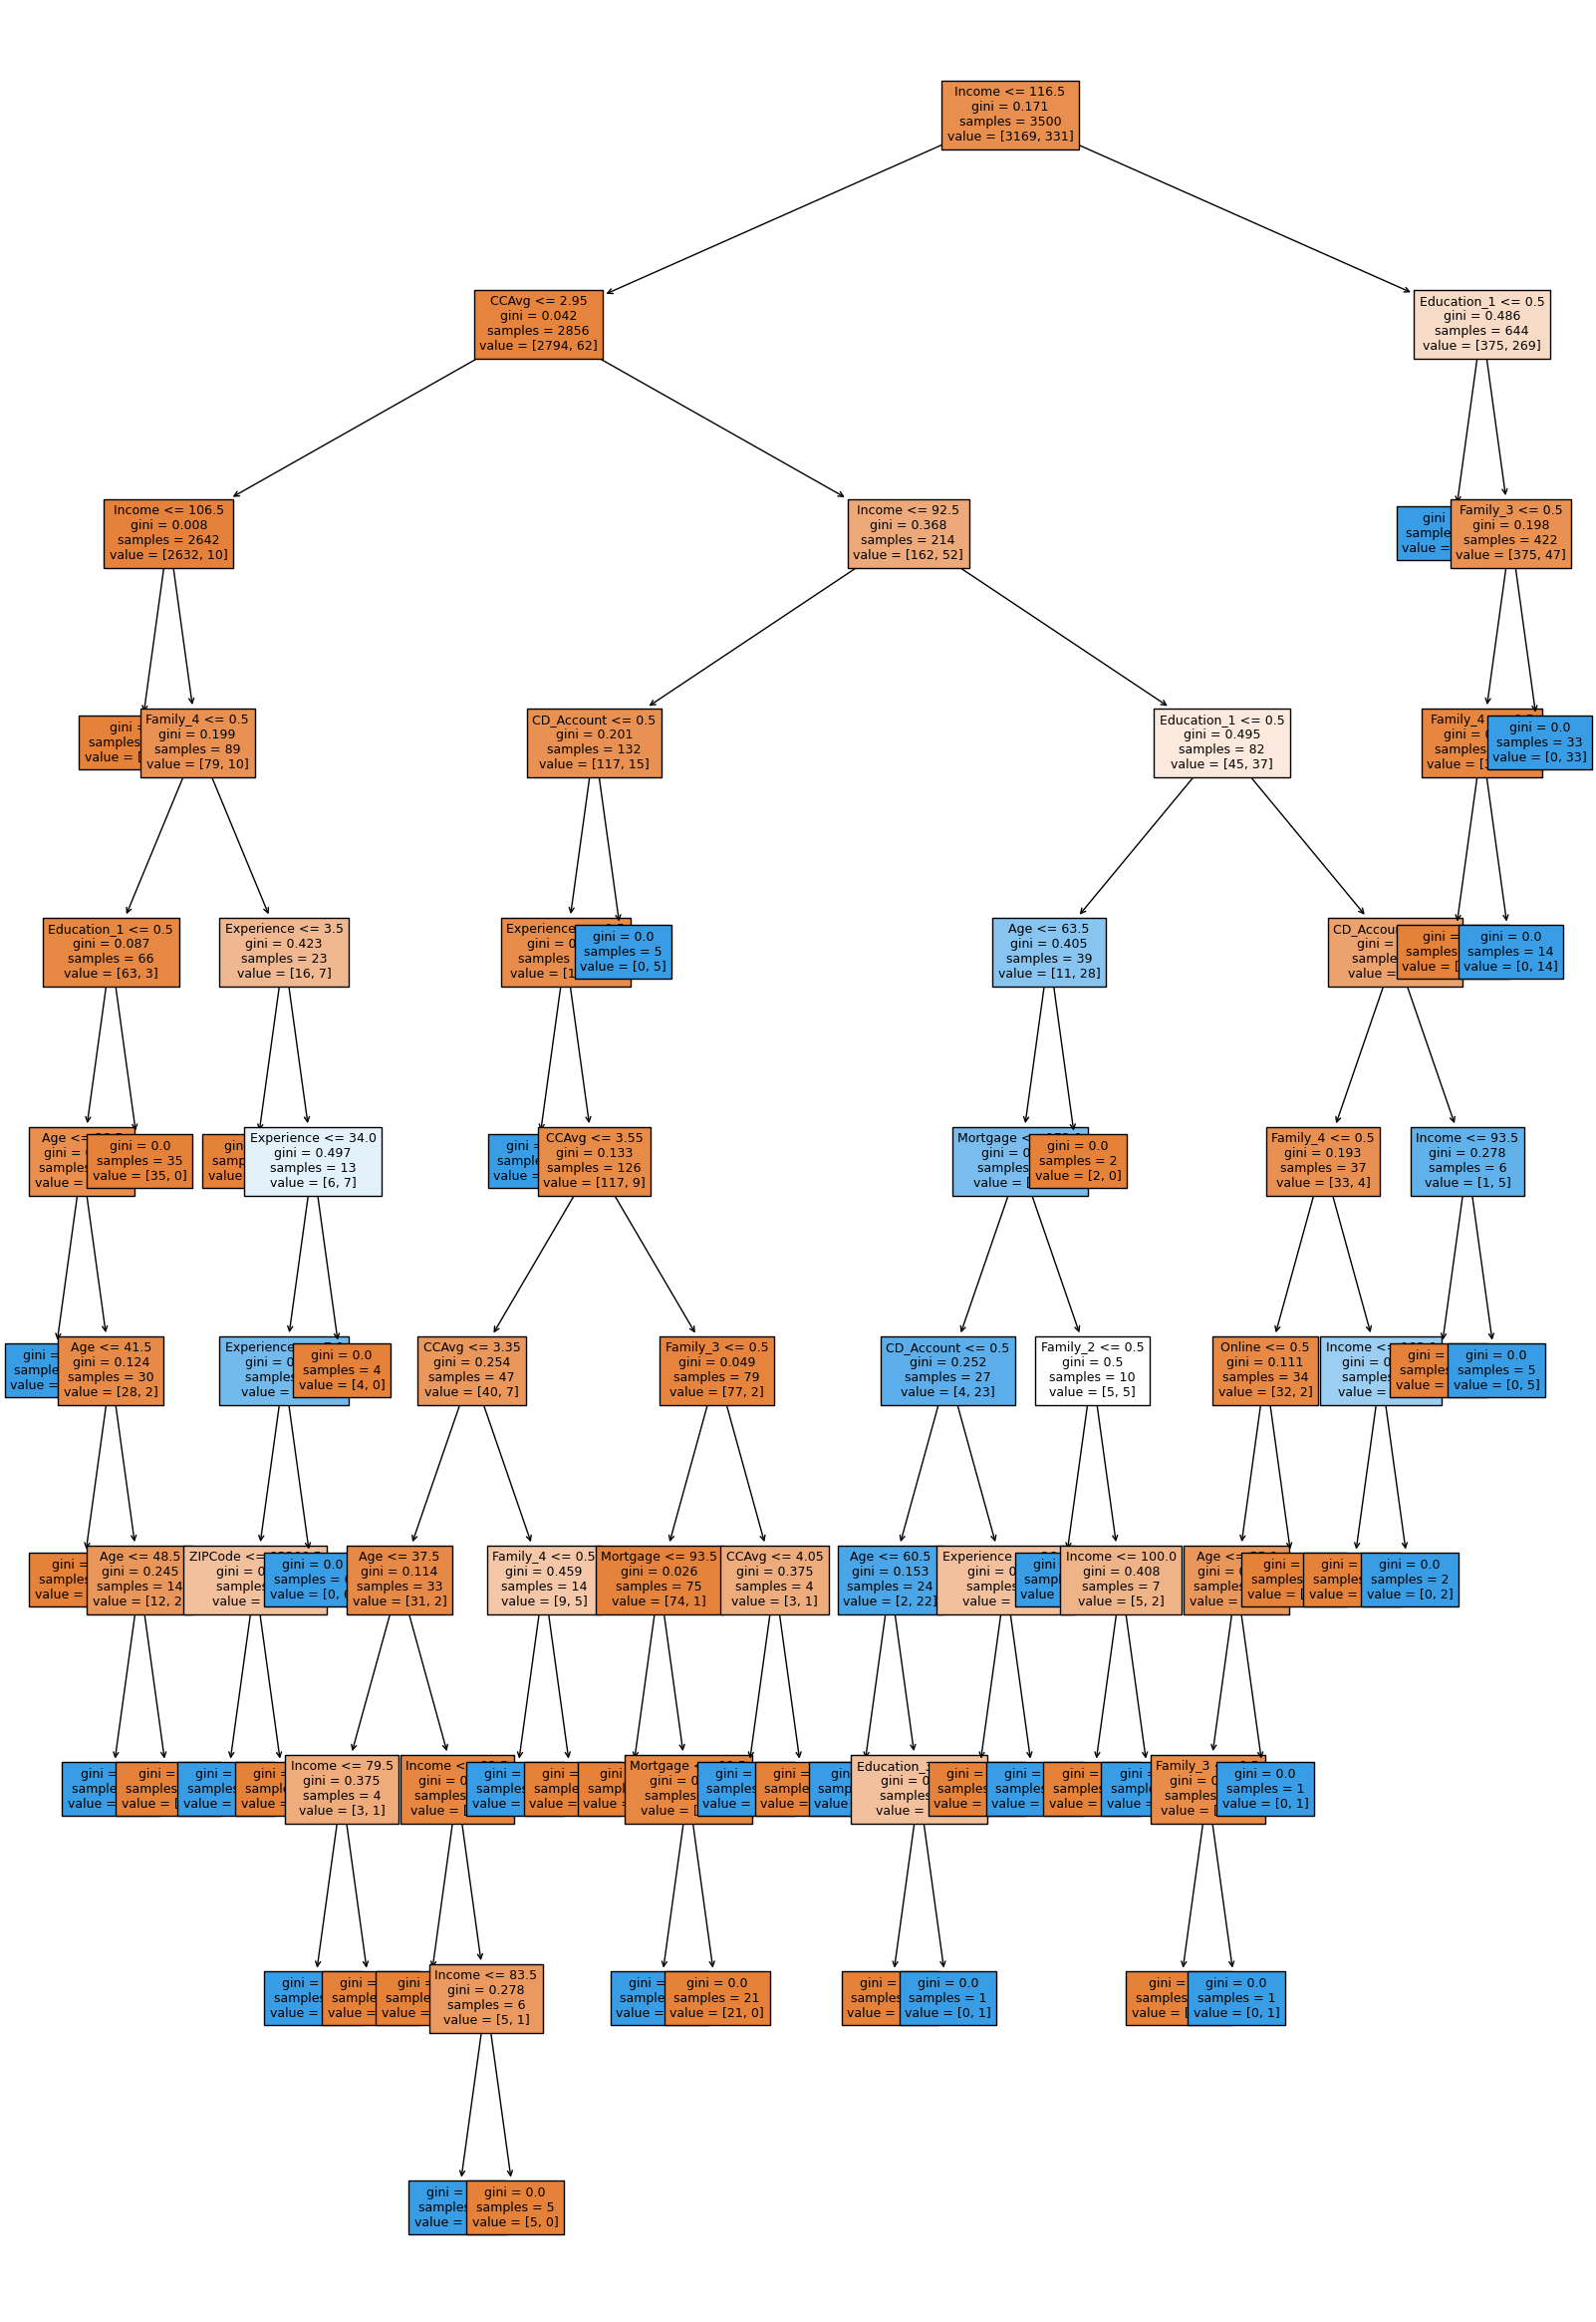

In [103]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [104]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Education_1 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Education_1 >  0.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Exper

In [105]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education_1         0.401465
Income              0.313312
Family_3            0.098116
Family_4            0.062971
CCAvg               0.044686
CD_Account          0.025711
Age                 0.019745
Experience          0.019103
Mortgage            0.006307
Family_2            0.003575
Education_3         0.002224
ZIPCode             0.002224
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
Education_2         0.000000
Family_1            0.000000


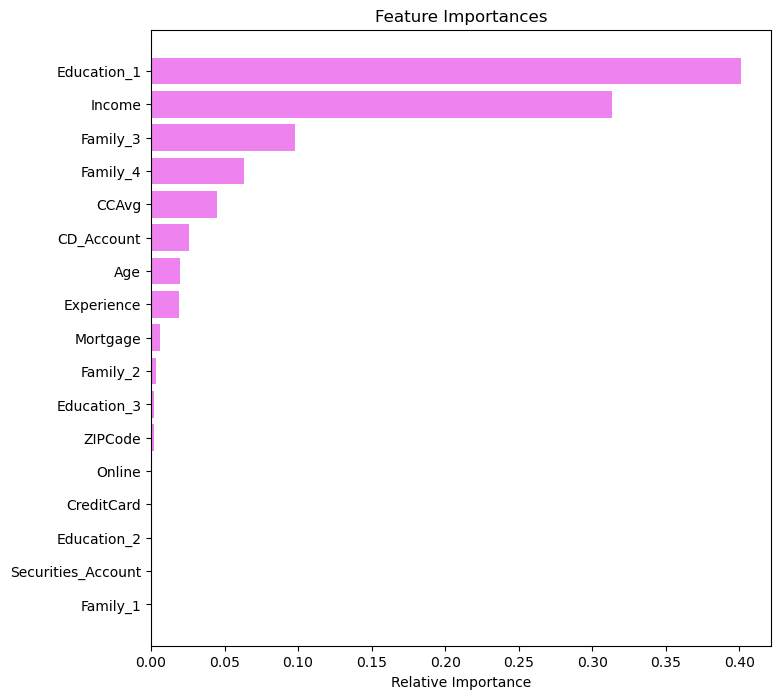

In [106]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

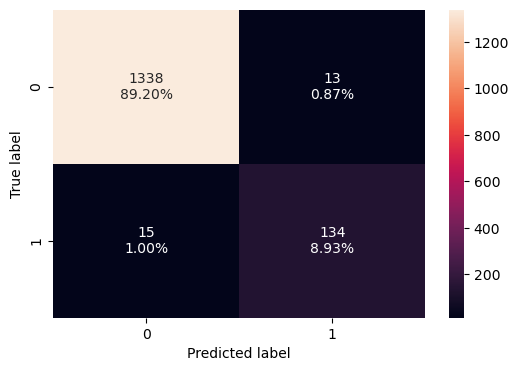

In [108]:
confusion_matrix_sklearn(model, X_test, y_test)  # Complete the code to get the confusion matrix for test data

In [109]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


Conclusion
* I analyzed the "Potential Loan marketing data"  Decision Tree Classifier to build a predictive model. The predictive model helps predict if customer will buy a personal loan or not.
* Income, education, family, and credit card usage are the most important features in predicting potential loan customers.


Recommendations
* From the decision tree model, income is the most important feature. If our customer's yearly income is less than 98.5K, there is a good chance the customer won't have a personal loan.
* From the model, those customers with an income greater than 98.5 and with an education level greater than or equal to 3 (Advanced/Professional) were most likely to have a personal loan. Recommend to target customers that have incomes lower than 98K.
* The analysis revealed that customers utilizing online facilities were more inclined to have personal loans. Enhance the website's user-friendliness and promote adoption among customers who are not utilizing these facilities. Simplify the personal loan application process to enhance user experience.